# Import Libraries & Tools

In [1]:
#import libraries
library(tidyverse) 
library(gridExtra, warn.conflicts = FALSE)
library(reshape2, warn.conflicts = FALSE)
library(caret, warn.conflicts = FALSE)
library(mlbench, warn.conflicts = FALSE)

── Attaching packages ────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice



# Data Exploration

In [2]:
#read in the data from .csv file
df <- read.csv('sample_data.csv', header=TRUE, stringsAsFactors=FALSE) #read in data
head(df)

,ID,tenure,sec_sell_thru,sec_margin_percent,scan_rate,posting_rate,realized_value_perc,time_diff,distance_to_client_venue,renewal
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,0.0000000,0.00000000,0.3529412,0.00000000,0.7783,-25.5000,9,1
2,2,1,0.5500000,-0.18851101,0.8235294,0.08597285,0.9493,0.0000,18,0
3,3,1,0.8387097,-0.03998539,0.9901961,0.20120120,0.9835,3.6000,7,1
4,4,1,0.0000000,0.00000000,1.0000000,0.00000000,1.0000,-54.7308,33,1
5,5,1,1.0000000,-0.11928005,0.9411765,0.10679612,0.9919,-29.0000,10,1
6,6,1,0.0000000,0.00000000,0.0000000,0.00000000,1.0000,0.0000,14,0


In [3]:
#descriptive statistics
summary(df) #I'm not sure how to display these in a more readable format without extra packages

       ID             tenure      sec_sell_thru    sec_margin_percent
 Min.   :   1.0   Min.   :0.000   Min.   :0.0000   Min.   :-0.6982   
 1st Qu.: 250.8   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.: 0.0000   
 Median : 500.5   Median :1.000   Median :0.0000   Median : 0.0000   
 Mean   : 500.5   Mean   :0.966   Mean   :0.2866   Mean   : 0.1013   
 3rd Qu.: 750.2   3rd Qu.:1.000   3rd Qu.:0.5216   3rd Qu.: 0.1009   
 Max.   :1000.0   Max.   :1.000   Max.   :3.0000   Max.   : 2.1212   
   scan_rate       posting_rate    realized_value_perc   time_diff      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000      Min.   :-97.000  
 1st Qu.:0.8235   1st Qu.:0.0000   1st Qu.:0.8407      1st Qu.:-43.897  
 Median :0.9246   Median :0.1022   Median :0.9478      Median :-26.656  
 Mean   :0.8645   Mean   :0.1348   Mean   :0.8977      Mean   :-27.952  
 3rd Qu.:0.9706   3rd Qu.:0.2330   3rd Qu.:1.0000      3rd Qu.: -8.542  
 Max.   :1.0000   Max.   :0.5000   Max.   :1.6293      Max.   : 55.250  

In [4]:
#get the datatypes of each column
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ ID                      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tenure                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sec_sell_thru           : num  0 0.55 0.839 0 1 ...
 $ sec_margin_percent      : num  0 -0.189 -0.04 0 -0.119 ...
 $ scan_rate               : num  0.353 0.824 0.99 1 0.941 ...
 $ posting_rate            : num  0 0.086 0.201 0 0.107 ...
 $ realized_value_perc     : num  0.778 0.949 0.984 1 0.992 ...
 $ time_diff               : num  -25.5 0 3.6 -54.7 -29 ...
 $ distance_to_client_venue: num  9 18 7 33 10 14 10 14 213 10 ...
 $ renewal                 : int  1 0 1 1 1 0 1 1 1 1 ...


## Observations

* All our data is either integers or floats with no missing/null values
* Overwhelming majority of STH have tenure of 1 year
* Overwhelming majority of STH renewed their tickets
* Average STH attended ~86% of games, and tried to sell their ticket ~13% of the time
* Average STH sold their ticket ~28% of the time
* STH who sold tickets made, on average, ~10% profit
* Judging from the `mean` values and the `Max.` values, we have many outliers in data, particularly in the following:
    * `sec_sell_thru`
    * `sec_margin_percent`
    * `time_diff`
    * `distance_to_client_venue`

In [5]:
length(unique(df$ID)) #verifying each ID is unique

[1] 1000

In [6]:
df = subset(df, select = -c(ID)) #removes ID column because each value is unique, which isn't helpful
head(df)

,tenure,sec_sell_thru,sec_margin_percent,scan_rate,posting_rate,realized_value_perc,time_diff,distance_to_client_venue,renewal
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0.0000000,0.00000000,0.3529412,0.00000000,0.7783,-25.5000,9,1
2,1,0.5500000,-0.18851101,0.8235294,0.08597285,0.9493,0.0000,18,0
3,1,0.8387097,-0.03998539,0.9901961,0.20120120,0.9835,3.6000,7,1
4,1,0.0000000,0.00000000,1.0000000,0.00000000,1.0000,-54.7308,33,1
5,1,1.0000000,-0.11928005,0.9411765,0.10679612,0.9919,-29.0000,10,1
6,1,0.0000000,0.00000000,0.0000000,0.00000000,1.0000,0.0000,14,0


# Distribution of Data

In [7]:
# int_cols = c('tenure', 'renewal')
# float_cols = c('sec_sell_thru', 'sec_margin_percent', 'scan_rate', 'posting_rate', 'realized_value_perc', 'time_diff', 'distance_to_client_venue')
feature_cols = c('tenure', 'sec_sell_thru', 'sec_margin_percent', 'scan_rate', 'posting_rate', 'realized_value_perc', 'time_diff', 'distance_to_client_venue')
target = c('renewal')

### Note
I love to graph things, and I typically spend inordinate amounts of time making nice static graphs. I was trying to produce one big graph that had many subplots in it, instead of creating multiple individual plots. I know this has to be possible in R, but I haven't spent enough time with it yet. Apologies!

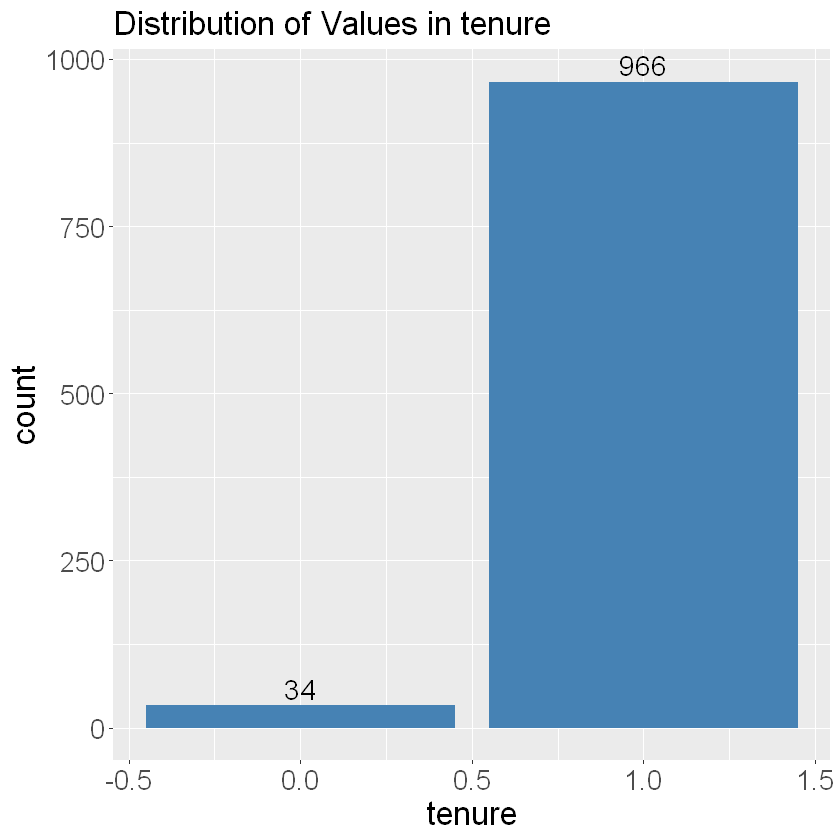

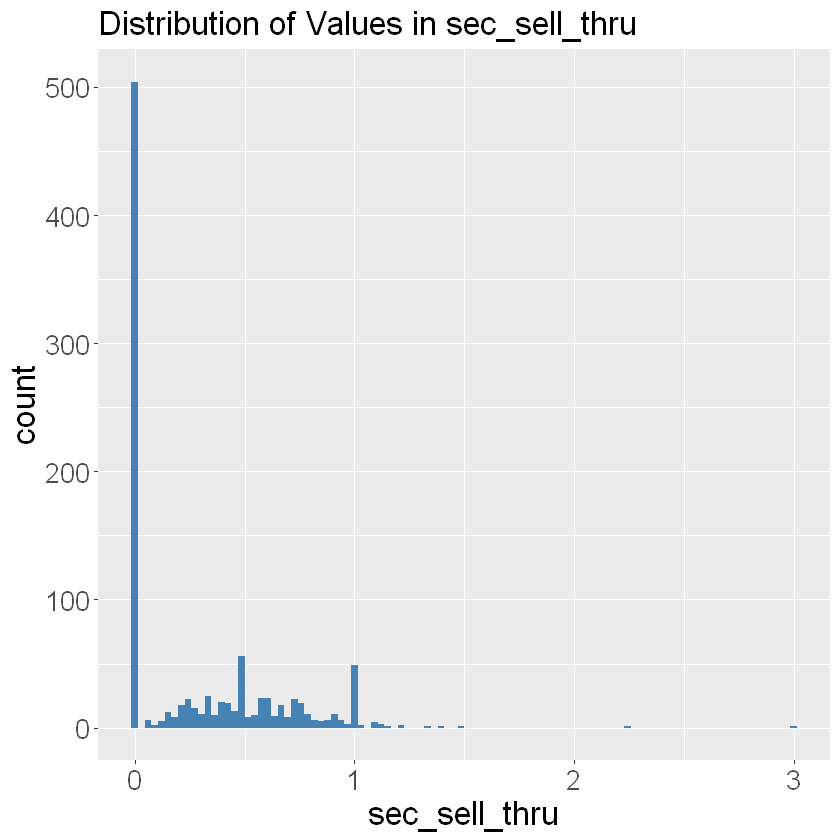

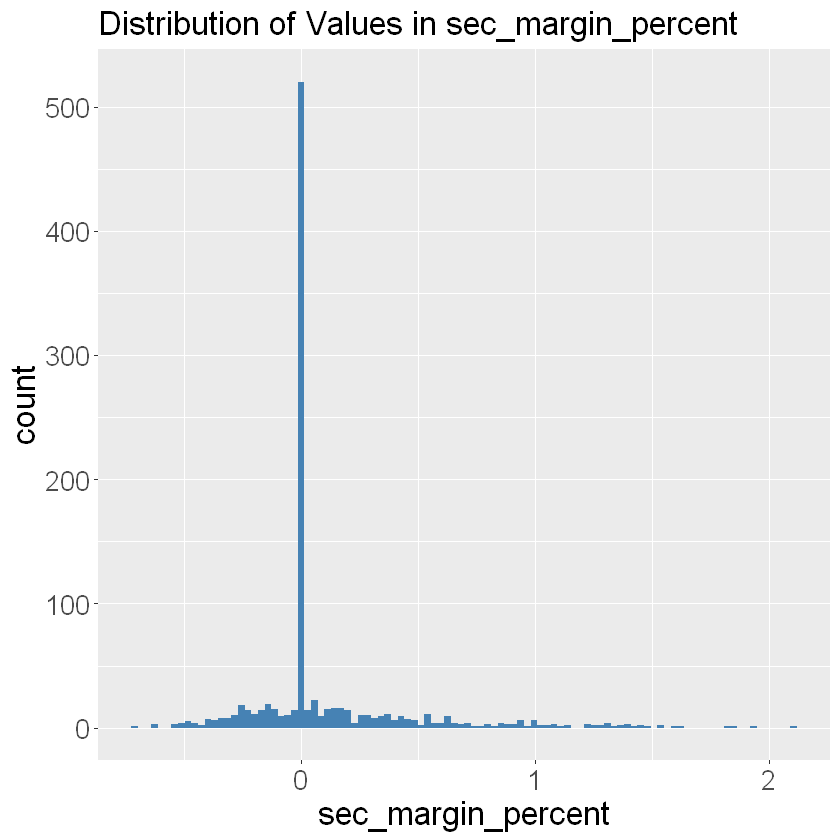

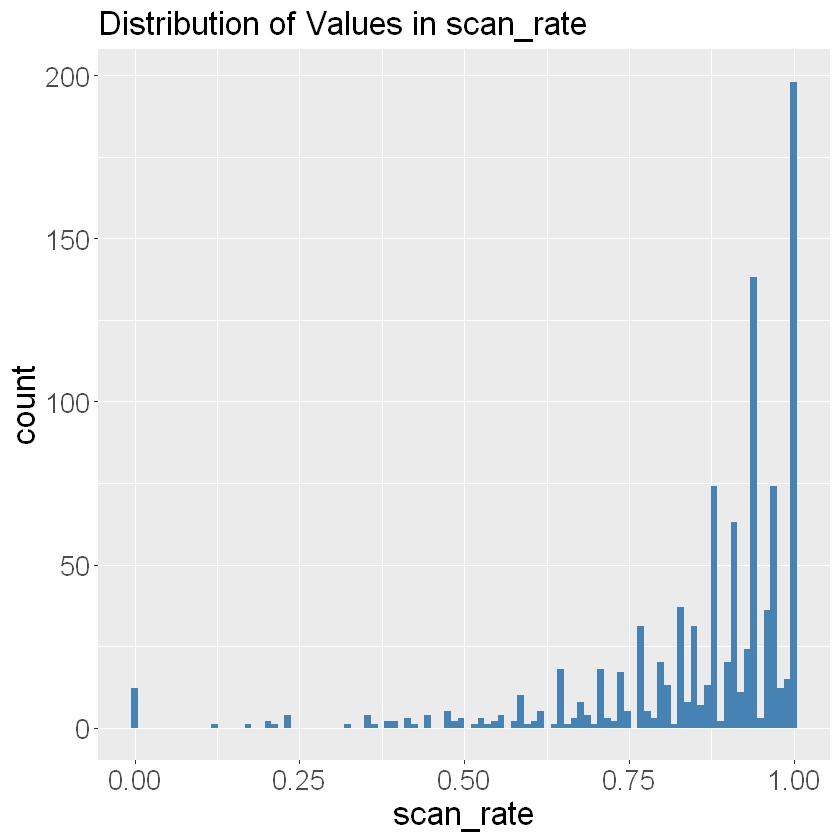

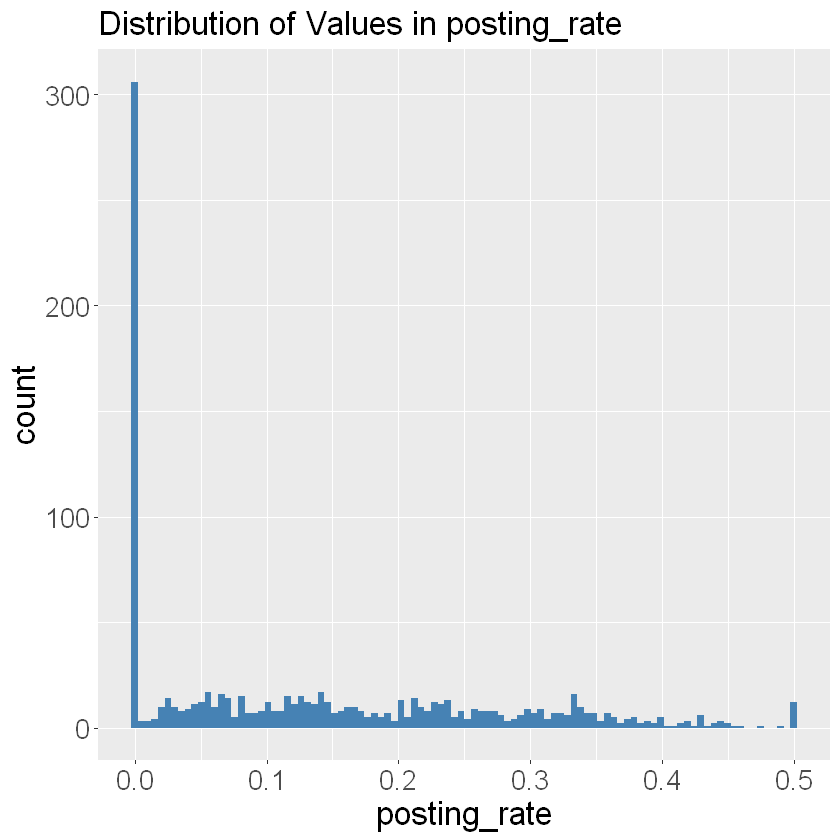

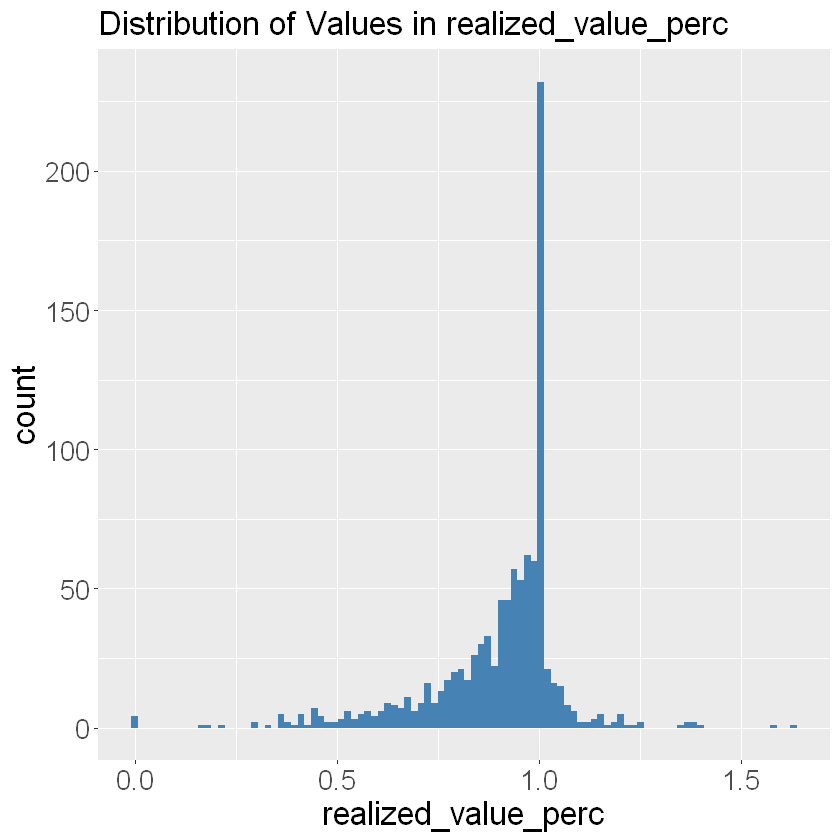

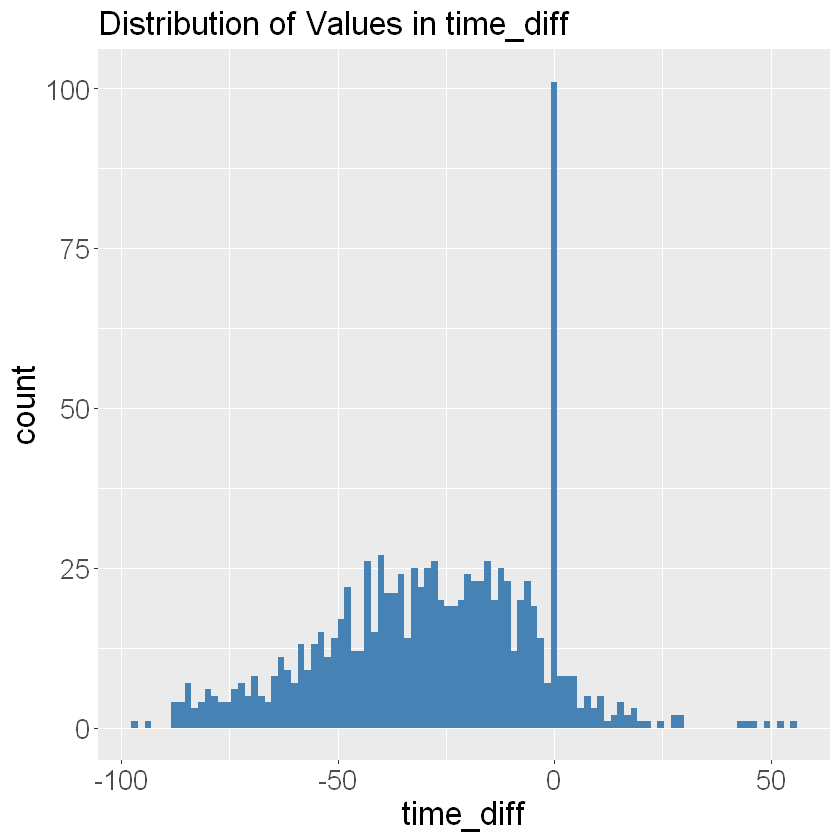

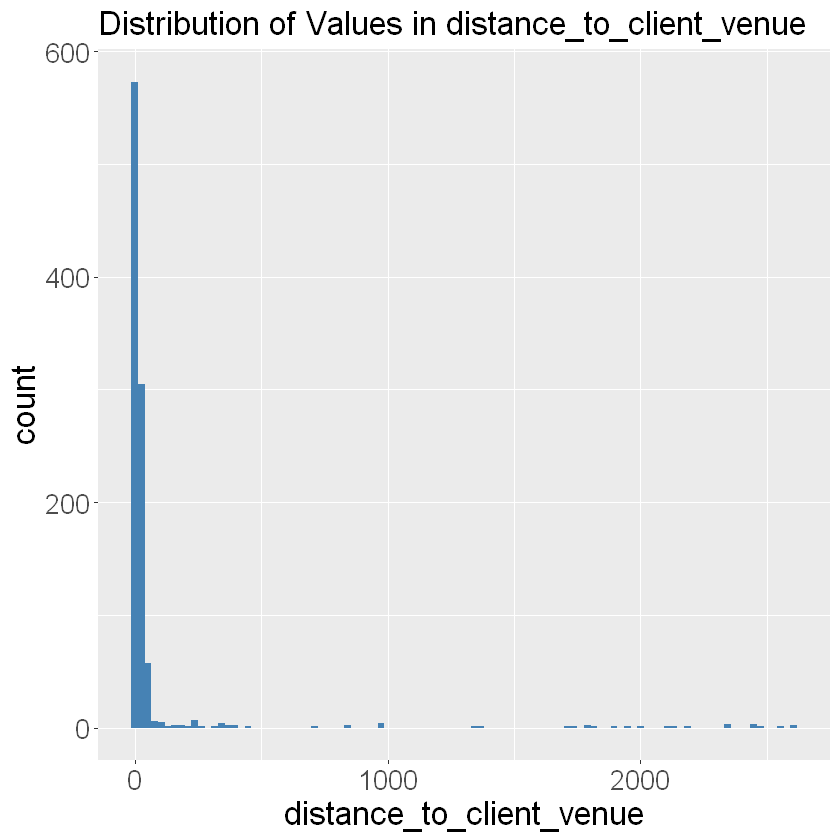

In [8]:
#list to store plots (can't seem to figure out why it isn't storing plots though...)
plot_list <- list()

#function to quickly graph distribution of data (figure out how to create one big plot?)
make_graphs <- function(df, cols) {
    #check column type, then create the proper graph
    for (col in cols){
        if (class(df[, col]) == 'integer'){
            plot <- ggplot(df, aes_string(x=col)) +
                geom_bar(stat='count', fill='steelblue') +
                geom_text(aes(label = ..count..), stat='count', vjust=-0.3, size=6)
        } else {
            plot <- ggplot(df, aes_string(x=col)) +
                geom_histogram(bins=100, stat='bin', fill='steelblue')
        }
        plot <- plot +
            ggtitle(sprintf("Distribution of Values in %s", col)) +
            theme(axis.text.x = element_text(size=16), #xtick mark size
                axis.text.y = element_text(size=16),  #ytick mark size
                axis.title=element_text(size=20), #label size
                plot.title=element_text(size=20)) #title size
        plot_list[[col]] <- plot #add plot to list (not working?)
        print(plot_list[[col]]) #display each plot
    }
}

plot_list <- make_graphs(df, feature_cols)

## Observations
* Most of the data does not have a normal distribution (i.e. it's skewed)
    * Could be an issue for some ML models
* A lot of our data has outliers, which should be taken into account
    * Could also be an issue for some ML models
* Over half of the STH sampled re-sold their tickets at/near face-value
* The bottom 75% of STH had a `sec_margin_percent` ~0.10
* Just under one-third of STH didn't try to sell their tickets
* Most fans showed up to the game ~27 minutes early
* 75% of STH travelled ~23 miles to get to the venue
* `Renewal` data is severely imbalanced
    * May cause issues for some classification models

# Feature Correlation

In [9]:
# rounding to 3 decimal places
corr_mat <- round(cor(df), 3) 
corr_mat

,tenure,sec_sell_thru,sec_margin_percent,scan_rate,posting_rate,realized_value_perc,time_diff,distance_to_client_venue,renewal
tenure,1.000,0.047,0.042,0.017,-0.022,0.061,-0.057,-0.002,0.085
sec_sell_thru,0.047,1.000,0.323,0.073,0.464,0.130,0.011,0.064,-0.017
sec_margin_percent,0.042,0.323,1.000,0.075,0.201,0.297,0.020,0.072,-0.038
scan_rate,0.017,0.073,0.075,1.000,-0.022,0.443,-0.268,-0.059,0.313
posting_rate,-0.022,0.464,0.201,-0.022,1.000,-0.132,0.035,-0.040,-0.023
realized_value_perc,0.061,0.130,0.297,0.443,-0.132,1.000,-0.133,0.009,0.055
time_diff,-0.057,0.011,0.020,-0.268,0.035,-0.133,1.000,0.074,-0.163
distance_to_client_venue,-0.002,0.064,0.072,-0.059,-0.040,0.009,0.074,1.000,-0.047
renewal,0.085,-0.017,-0.038,0.313,-0.023,0.055,-0.163,-0.047,1.000


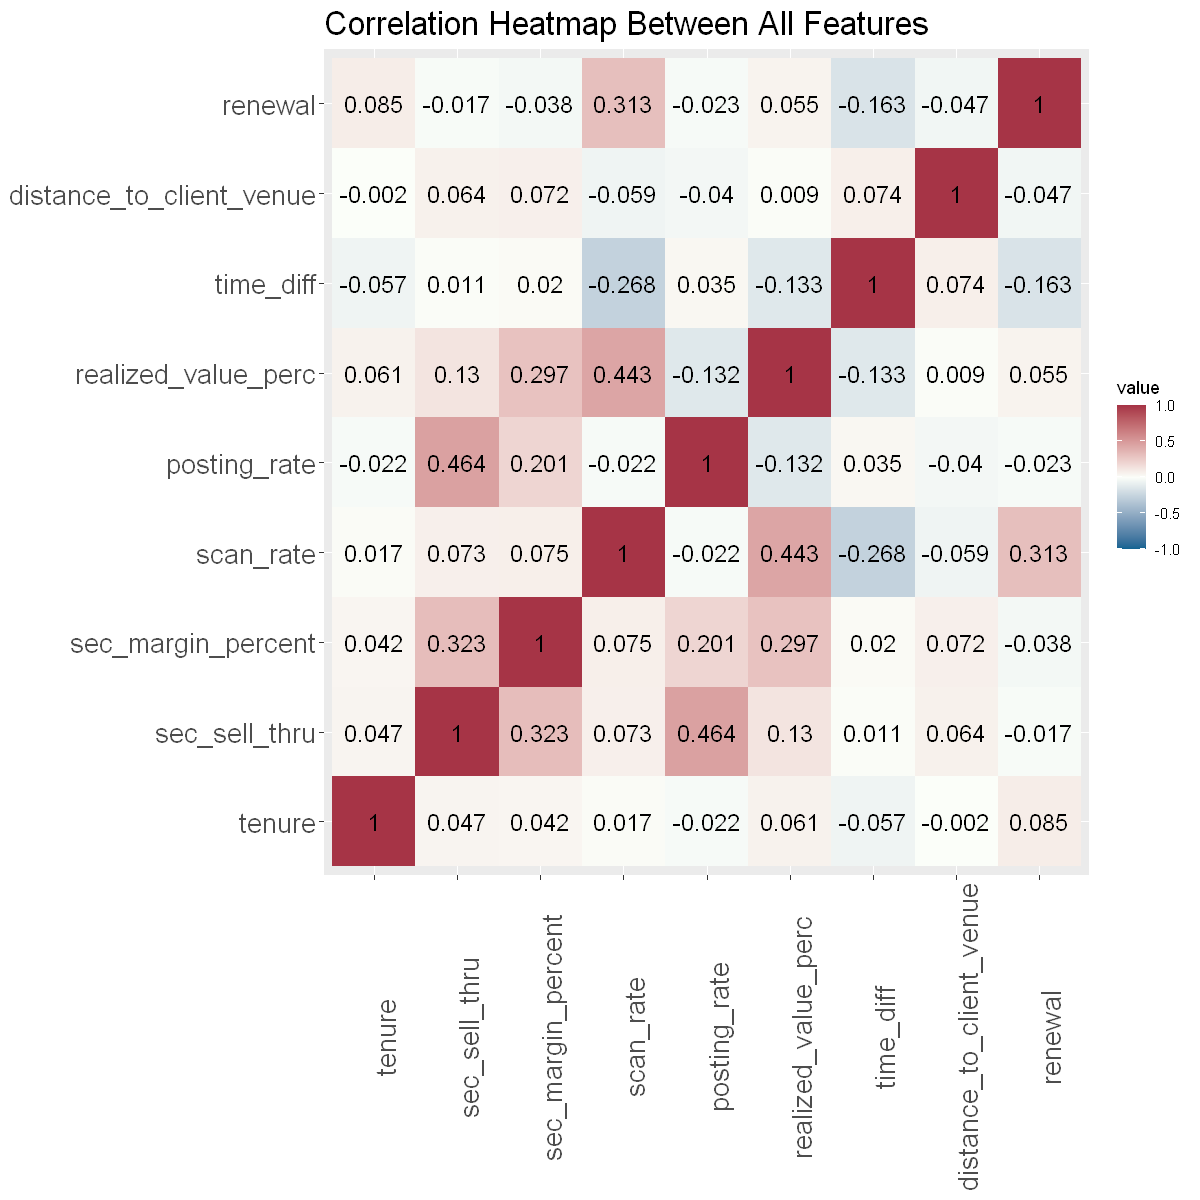

In [10]:
melted_corr_mat <- melt(corr_mat)
options(repr.plot.width = 10, repr.plot.height =10)
ggplot(melted_corr_mat, aes(x=Var1, y=Var2, fill=value)) +
    geom_tile() +
    ggtitle(sprintf("Correlation Heatmap Between All Features")) +
    scale_fill_gradient2(mid="#FBFEF9",low="#0C6291",high="#A63446", limits=c(-1,1)) +
    geom_text(aes(Var2, Var1, label = value), color = "black", size = 5) +
    theme(axis.text.x = element_text(size=16, angle=90), #xtick mark size
        axis.text.y = element_text(size=16), #ytick mark size
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.title=element_text(size=20),
        plot.title=element_text(size=20))

## Observations
* Strong positive correlations between:
    * `sec_sell_thru` & `sec_margin_percent` - obviously if a STH sells their ticket, the `sec_margin_percent` gets affected
    * `posting_rate` & `sec_sell thru` - similarly, the `sec_sell_thru` rate changes based on `posting_rate`
    * `scan_rate` & `realized_value_perc` - the more a STH uses their tickets, the more value they get out of them
    * `scan_rate` & `renewal` - the more a STH attends games, the more of an affect it has on their decision to renew
* Strong negative correlations between:
    * `time_diff` & `scan_rate` - STH who attend more games are probably "bigger" fans, and like to show up earlier
    * `time_diff` & `renewal` - STH who show up early are more likely to be "bigger" fans, and perhaps more likely to renew
    * `posting_rate` & `realized_value_perc` - STH who try to sell their tickets get less value since they aren't using them
    
## Feature Correlation to Renewal

In [11]:
# rounding to 3 decimal places
renewal_corr <- as.data.frame(round(cor(df[-9], df$renewal), 3)) #correlation between all columns and renewal

#sort the dataframe in descending order
renewal_sorted <- renewal_corr[order(-renewal_corr$V1),, drop=FALSE]
renewal_sorted <- data.matrix(renewal_sorted) #couldn't get heatmap to work without this

melted <- melt(renewal_sorted) #needed for following heatmap
melted

Var1,Var2,value
<fct>,<fct>,<dbl>
scan_rate,V1,0.313
tenure,V1,0.085
realized_value_perc,V1,0.055
sec_sell_thru,V1,-0.017
posting_rate,V1,-0.023
sec_margin_percent,V1,-0.038
distance_to_client_venue,V1,-0.047
time_diff,V1,-0.163


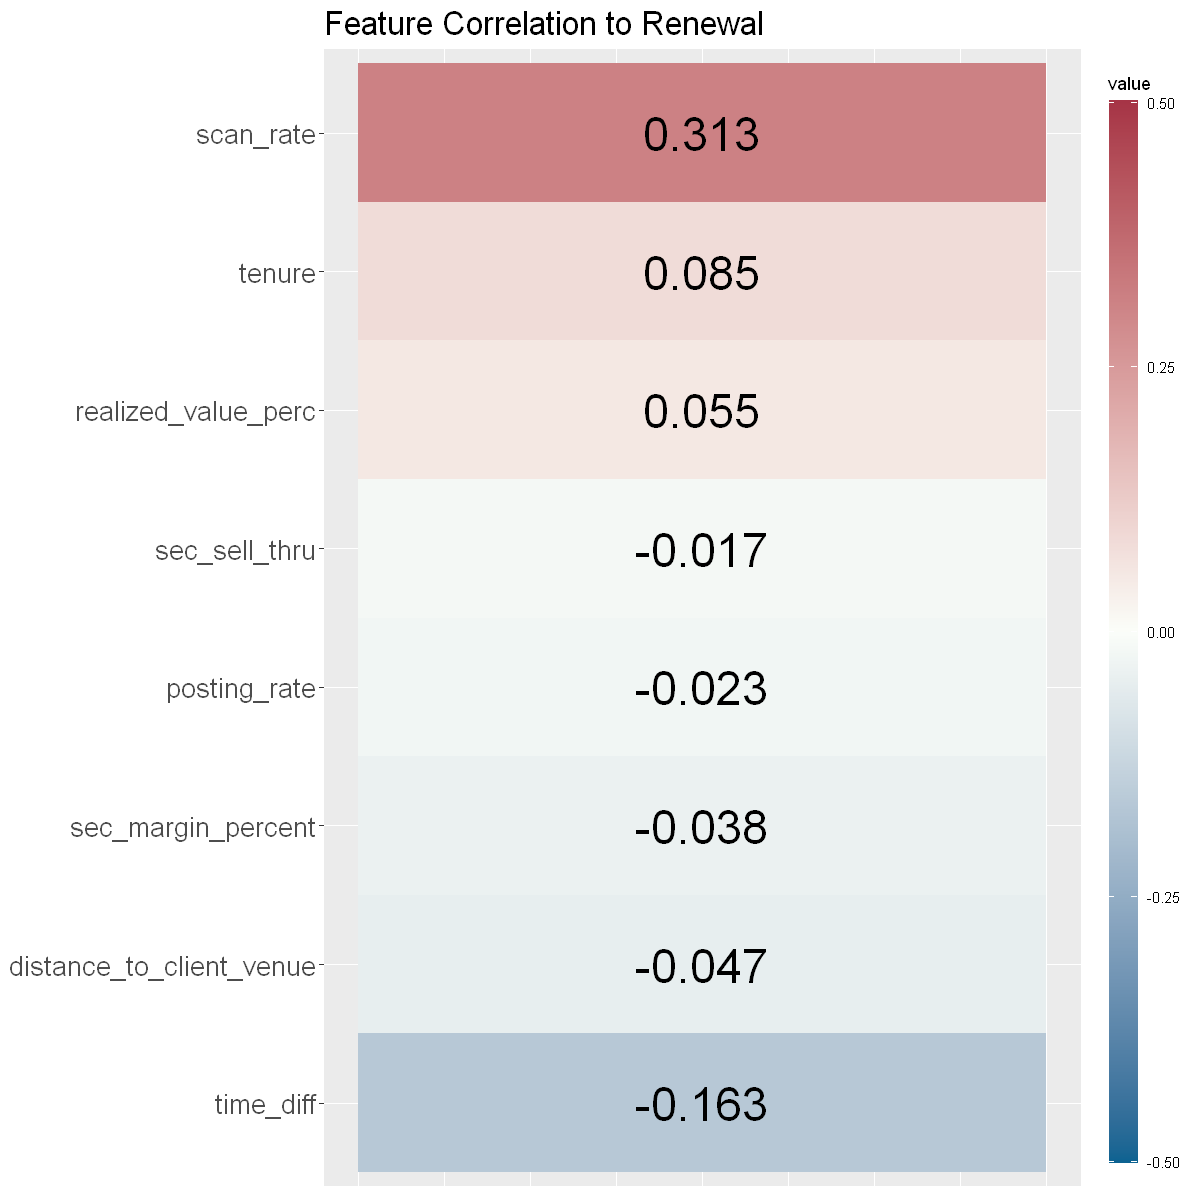

In [12]:
ggplot(melted, aes(x=1, y=Var1, fill=value)) + 
    geom_tile() + 
    ggtitle(sprintf("Feature Correlation to Renewal")) +
    scale_y_discrete(limits=rev) + #this line reversed the Y-axis!
    scale_fill_gradient2(mid="#FBFEF9",low="#0C6291",high="#A63446", limits=c(-0.5,0.5)) +
    geom_text(aes(x=1, y=Var1, label=value), color = "black", size = 10) +
    theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_text(size=16),  #ytick label size
        axis.title = element_text(size=20), 
        legend.key.height = unit(4.5, 'cm'),
        plot.title=element_text(size=20))

### Observations
* The strongest correlating factor to whether or not a STH will renew is `scan_rate`
    * The more games attended, the more invested in the team they are, which will likely affect their decision to renew
    * It could also mean that the team performed incredibly well, and perhaps the games were more exciting, thus enticing the STH to attend more games
* `Tenure` also had a slightly positive correlation
    * If the STH had season tickets the year before, then they might be more inclined to remain a STH
* Distance to the venue, and the arrival time had a slightly negative correlation
    * The fans who *want* to be there, will be there regardless
    
# Outlier Detection

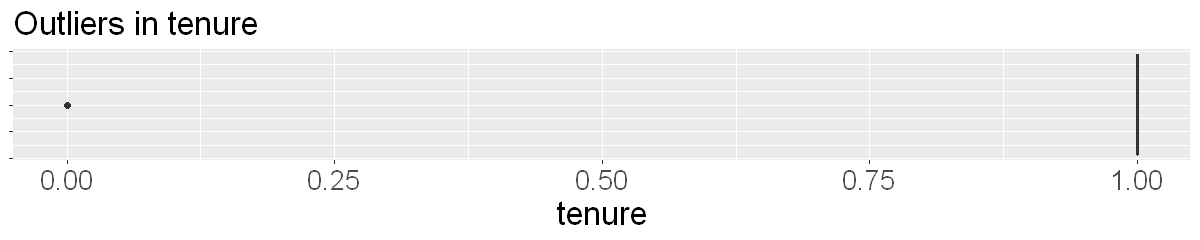

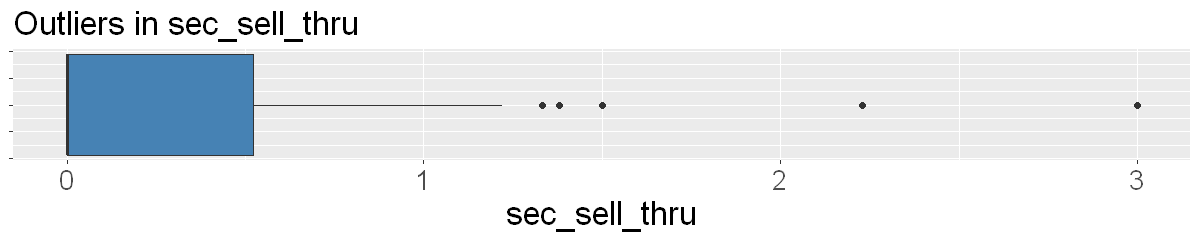

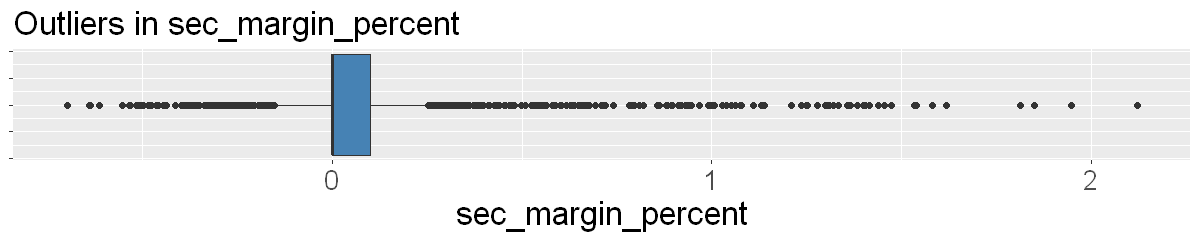

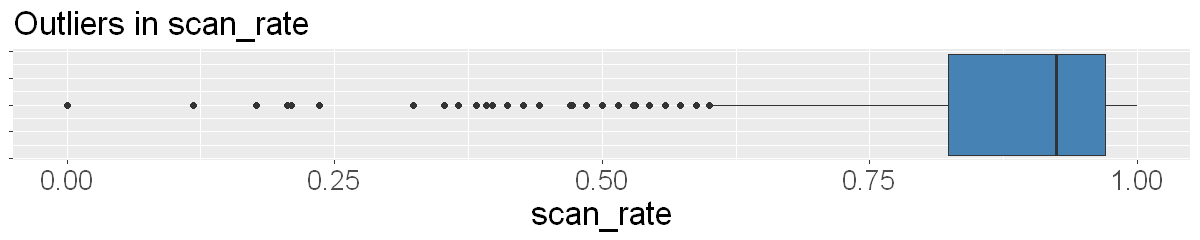

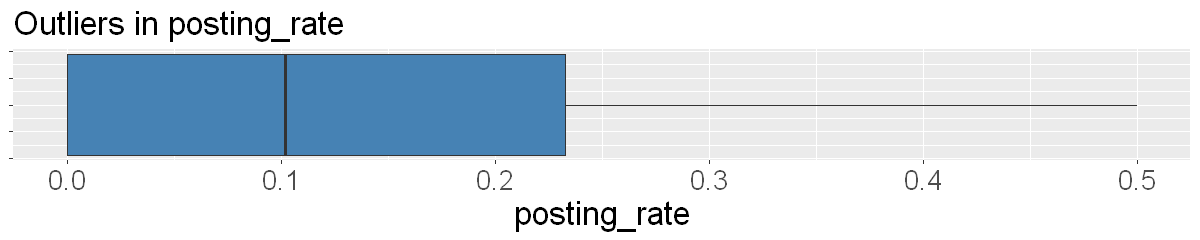

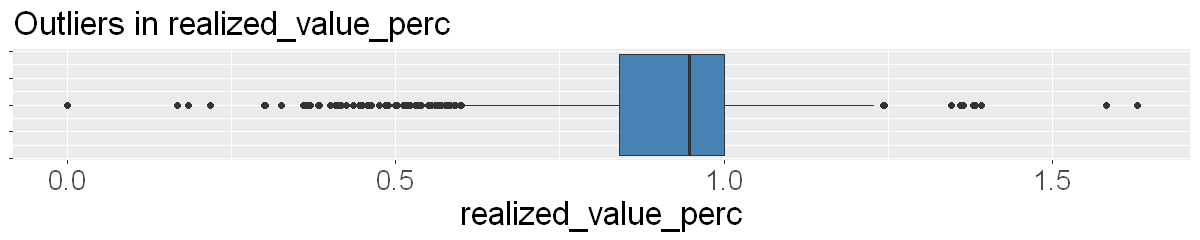

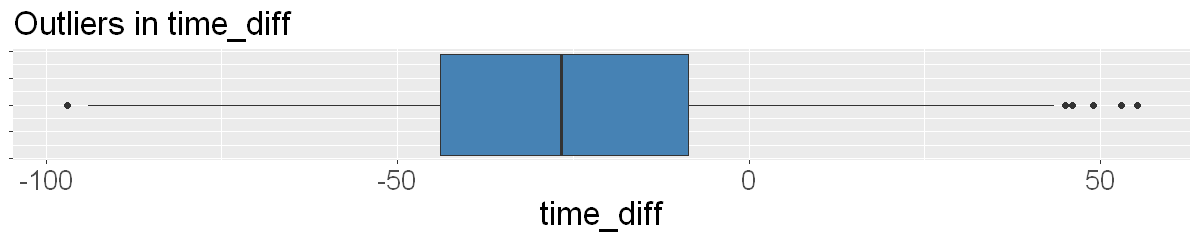

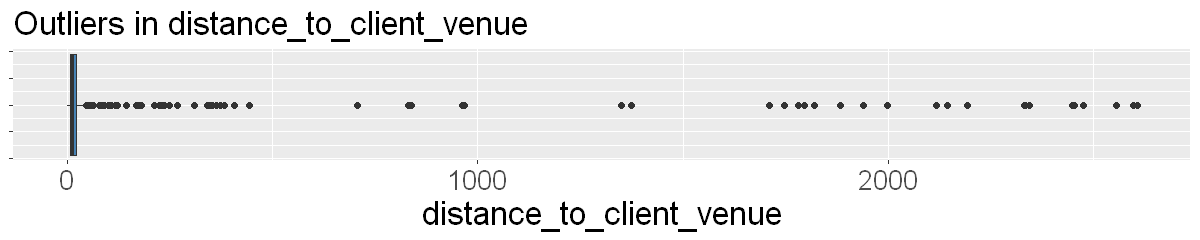

In [13]:
outlier_list = list()

#function to quickly graph distribution of data (figure out how to create one big plot?)
options(repr.plot.width=10, repr.plot.height=2)
outlier_graphs <- function(df, cols) {
    for (col in cols){
        plot <- ggplot(df, aes_string(x=col)) +
            geom_boxplot(fill='steelblue') +
            ggtitle(sprintf("Outliers in %s", col)) +
            theme(axis.text.x = element_text(size=16), #xtick mark size
                axis.text.y = element_blank(),  #ytick mark size
                axis.title=element_text(size=20), #label size
                plot.title=element_text(size=20)) #title size
        outlier_list[[col]] <- plot #add plot to list (not working?)
        print(outlier_list[[col]]) #display each plot
    }
}

outlier_list <- outlier_graphs(df, feature_cols)

In [14]:
#function that calculates IQR, and gets the number of records and percentage
#that are outside the IQR
get_outliers <- function(df, cols){
    total_outliers = 0
    print("************* # of Outliers *************")
    for (col in cols){
        q1 = quantile(df[, col], c(.25))
        q3 = quantile(df[, col], c(.75))
        iqr = q3-q1

        lower_tail = q1 - 1.5 * iqr
        upper_tail = q3 + 1.5 * iqr

        low = nrow(df[which(df[col] < lower_tail), ])
        high = nrow(df[which(df[col] > upper_tail), ])
                
        num_outliers = low + high
        total_outliers = total_outliers + num_outliers
        percent = round(num_outliers / nrow(df)*100,2)

        #gotta be an easier way to print/format this?
        print(sprintf("%*s: %*d - (%*g%%)", 24, col, 4, num_outliers, 4, percent))
    }
    print(sprintf("     Total # of outliers:  %d", total_outliers))
}

get_outliers(df, feature_cols)

[1] "************* # of Outliers *************"
[1] "                  tenure:   34 - ( 3.4%)"
[1] "           sec_sell_thru:    5 - ( 0.5%)"
[1] "      sec_margin_percent:  305 - (30.5%)"
[1] "               scan_rate:   73 - ( 7.3%)"
[1] "            posting_rate:    0 - (   0%)"
[1] "     realized_value_perc:   76 - ( 7.6%)"
[1] "               time_diff:    6 - ( 0.6%)"
[1] "distance_to_client_venue:  102 - (10.2%)"
[1] "     Total # of outliers:  601"


## Observations
* Over 8 columns (not including 'ID' and 'renewal') and 1,000 records, we have a total 601 outliers.
* `sec_margin_percent` and `distance_to_client_venue` are the worst offenders
* We *could* drop the outliers entirely, but in the interest of getting our model to the team ASAP, we'll keep them in for now.
* If given more time, I would go through each column and inspect the top X outliers to see just how bad they are, and if there's any possibility that it might have been an error (though the data team has assured me that everything is legit)

# Building Our Classification Model

We already have our data, which is free of null values. We can start preparing the model. We'll use a Logistic Regression model with all the features, and then we'll try it again with 2 or 3 of them.

In [15]:
#create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(df$renewal, p=0.80, list=FALSE)

#select 20% of the data for validation
validation <- df[-validation_index,]

#use the remaining 80% of data to training and testing the models
train_test_df <- df[validation_index,]

#verify dimensions of train_test_df and our validation set
dim(train_test_df)
dim(validation)

[1] 800   9

[1] 200   9

In [16]:
#summarize the class distribution (0 - did not renew, 1 - renewed)
percentage <- prop.table(table(train_test_df$renewal)) * 100
cbind(freq=table(train_test_df$renewal), percentage=percentage)

,freq,percentage
0,64,8
1,736,92


If given more time, I would experiment with balancing out the classes using a technique like Synthetic Minority Oversampling TEchnique, (a.k.a. SMOTE). In the interest of time, I'm going to continue.

In [17]:
#fits logistic regression model using all features
LR <- glm(renewal~., family=binomial, data=train_test_df)
summary(LR)


Call:
glm(formula = renewal ~ ., family = binomial, data = train_test_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7264   0.2470   0.3071   0.3900   1.5217  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.534e+00  8.996e-01  -1.705   0.0881 .  
tenure                    1.307e+00  5.090e-01   2.568   0.0102 *  
sec_sell_thru            -6.353e-01  4.204e-01  -1.511   0.1307    
sec_margin_percent       -9.060e-02  4.095e-01  -0.221   0.8249    
scan_rate                 3.684e+00  6.484e-01   5.681 1.34e-08 ***
posting_rate              7.252e-01  1.160e+00   0.625   0.5320    
realized_value_perc      -5.519e-01  8.417e-01  -0.656   0.5120    
time_diff                -1.577e-02  6.334e-03  -2.489   0.0128 *  
distance_to_client_venue -9.795e-05  3.158e-04  -0.310   0.7564    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken 

In [18]:
#get a quick check of how well our basic model performed
fitted.results <- predict(LR, newdata=subset(validation,select=c(1,2,3,4,5,6,7,8)),type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0) #sets the decision boundary
misClasificError <- mean(fitted.results != validation$renewal)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.925"


## Observations
* The coefficients indicate the average change in the log odds of a STH renewing
* For example, a one unit increase in `scan_rate` is associated with an average increase of ~3.68 in the log odds of a STH renewing
* The p-values give us an idea of how effective each feature is at predicting the probability of a STH renewing:
    * p-value of `scan_rate` < 1.34e-08
    * p-value of `time_diff` < 0.0128
    * p-value of `tenure` < 0.0102
* We can see that `scan_rate`, `time_diff`, and `tenure` seem to be the three most important predictors since they have the lowest p-values, while something like `distance_to_client_venue` is not nearly as important. (this tracks, according to our heatmaps from earlier)

In [19]:
#fitting a new model, but this time with just 3 features
LR2 <- glm(renewal~scan_rate+time_diff+tenure, family=binomial, data=train_test_df)
summary(LR2)


Call:
glm(formula = renewal ~ scan_rate + time_diff + tenure, family = binomial, 
    data = train_test_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6630   0.2534   0.3124   0.3867   1.4267  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.759493   0.668717  -2.631  0.00851 ** 
scan_rate    3.351892   0.590087   5.680 1.34e-08 ***
time_diff   -0.015905   0.006266  -2.538  0.01114 *  
tenure       1.190244   0.501831   2.372  0.01770 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 446.03  on 799  degrees of freedom
Residual deviance: 388.82  on 796  degrees of freedom
AIC: 396.82

Number of Fisher Scoring iterations: 6


In [20]:
fitted2.results <- predict(LR2, newdata=subset(validation,select=c(1,2,3,4,5,6,7,8)),type='response')
fitted2.results <- ifelse(fitted2.results > 0.5,1,0) #sets the decision boundary
misClasificError2 <- mean(fitted2.results != validation$renewal)
print(paste('Accuracy',1-misClasificError2))

[1] "Accuracy 0.93"


## Observations Pt.2
* We can see that with after training a new model with fewer features, our accuracy actually increased a tiny bit.
* The effect of all three features decreased slightly.
* The effectiveness of our features (p-values) remained roughly the same.
* Note that accuracy isn't the end-all-be-all metric. Recall & precision are just as important.

# Final Insights
* After my quick analysis, it seems `scan_rate`, `tenure`, and `time_diff` are the three biggest factors that determine a STH decision to renew their tickets.
* From a business standpoint, it seems like focusing on getting ticket holders to attend the games is the most important thing if we want them to renew (seems obvious of course, but there's data to back it up now :) )
    * How? Perhaps implement some kind of loyalty/incentive program for STH. For example, maybe for every home game a STH attends, they get 1% off the renewal price the following season. (I'm not a business person, please don't hate me if that's a terrible idea)
* Having some sort of pre-game entertainment might encourage more STH to arrive early.
    * Free swag? Free food/drinks?
    * Perhaps some kind of lottery of sorts within the first X minutes of the game?
* Tenured STH 
* The model used isn't perfect because the data has a lot of outliers, which could heavily affect the calculations